## Car Price Prediction

In [101]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


#### Import Libraries

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline

In [103]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline

#### Reading the data

In [105]:
data = pd.read_csv("downloads/car_prices_prediction.csv")

In [106]:
data.shape

(11914, 16)

In [107]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Countplot of different car companies (figsize = (width,height))

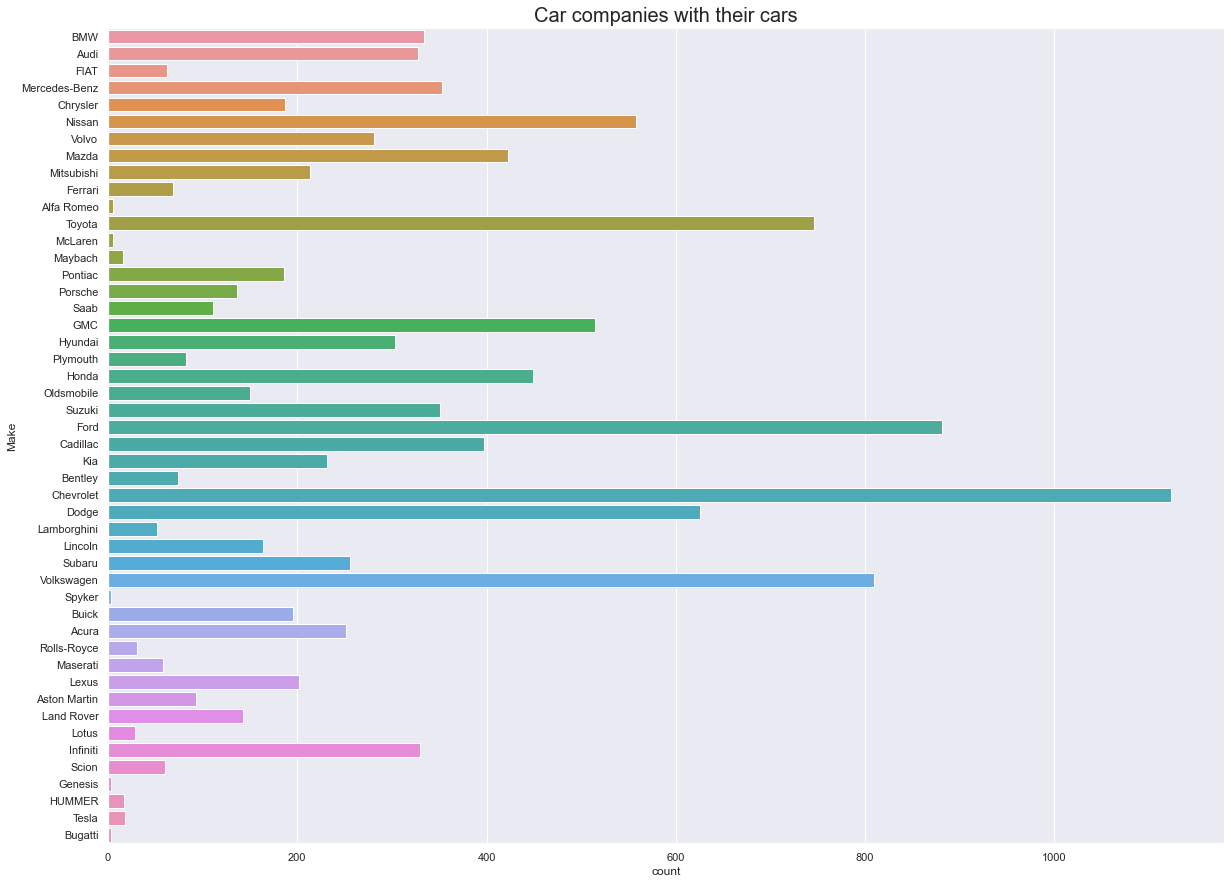

In [108]:
plt.figure(figsize = (20,15)) 
sns.countplot(y=data.Make)

plt.title('Car companies with their cars', fontsize=20)
plt.show()

#### In our assignment, we must interpret what we get.

We see that there are more than 1000 cars of the brand Chevrolet.

We also see that there are just a few cars for companies such as Bugatti and Genesis

#### Countplot of total cars per different years

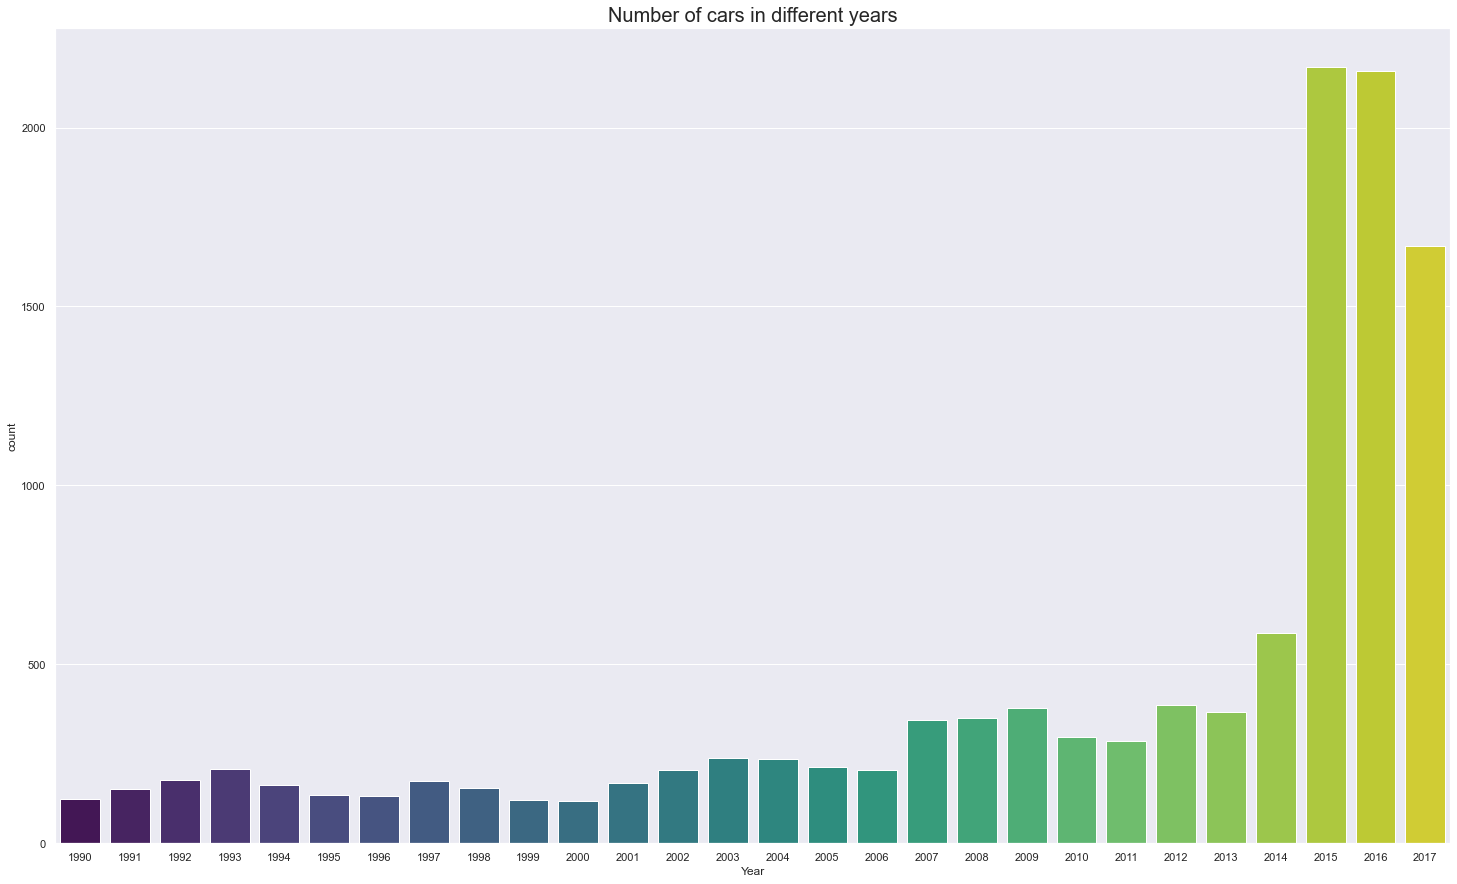

In [109]:
plt.figure(figsize = (25,15)) 
sns.countplot(x=data.Year, palette = 'viridis')

plt.title('Number of cars in different years', fontsize=20)
plt.show()

We can see that there are many cars in the years 2015 to 2017 compared to the other years. 

#### Counting the cars based on transmission type

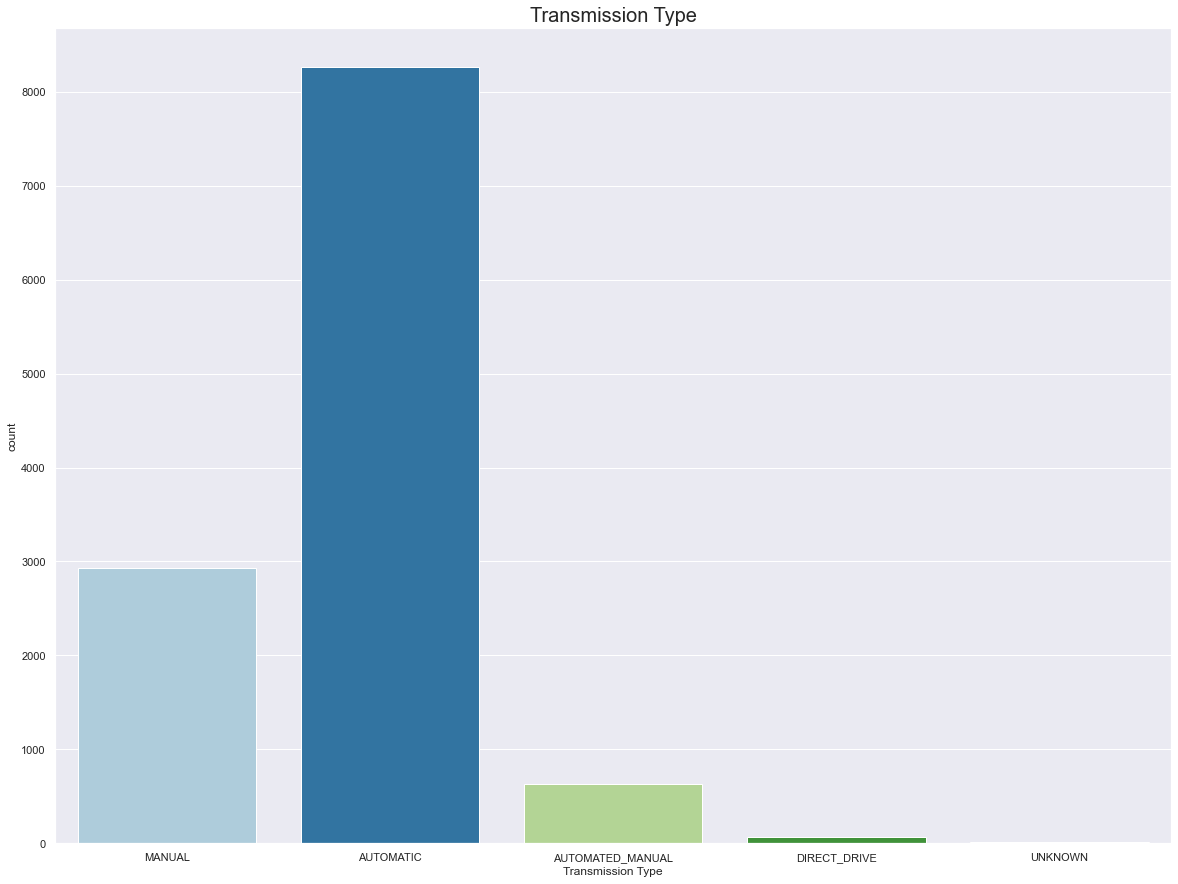

In [110]:
plt.figure(figsize = (20,15)) 
sns.countplot(data['Transmission Type'], palette= 'Paired')

plt.title('Transmission Type', fontsize=20)
plt.show()

#### Countplot of engine fuel type

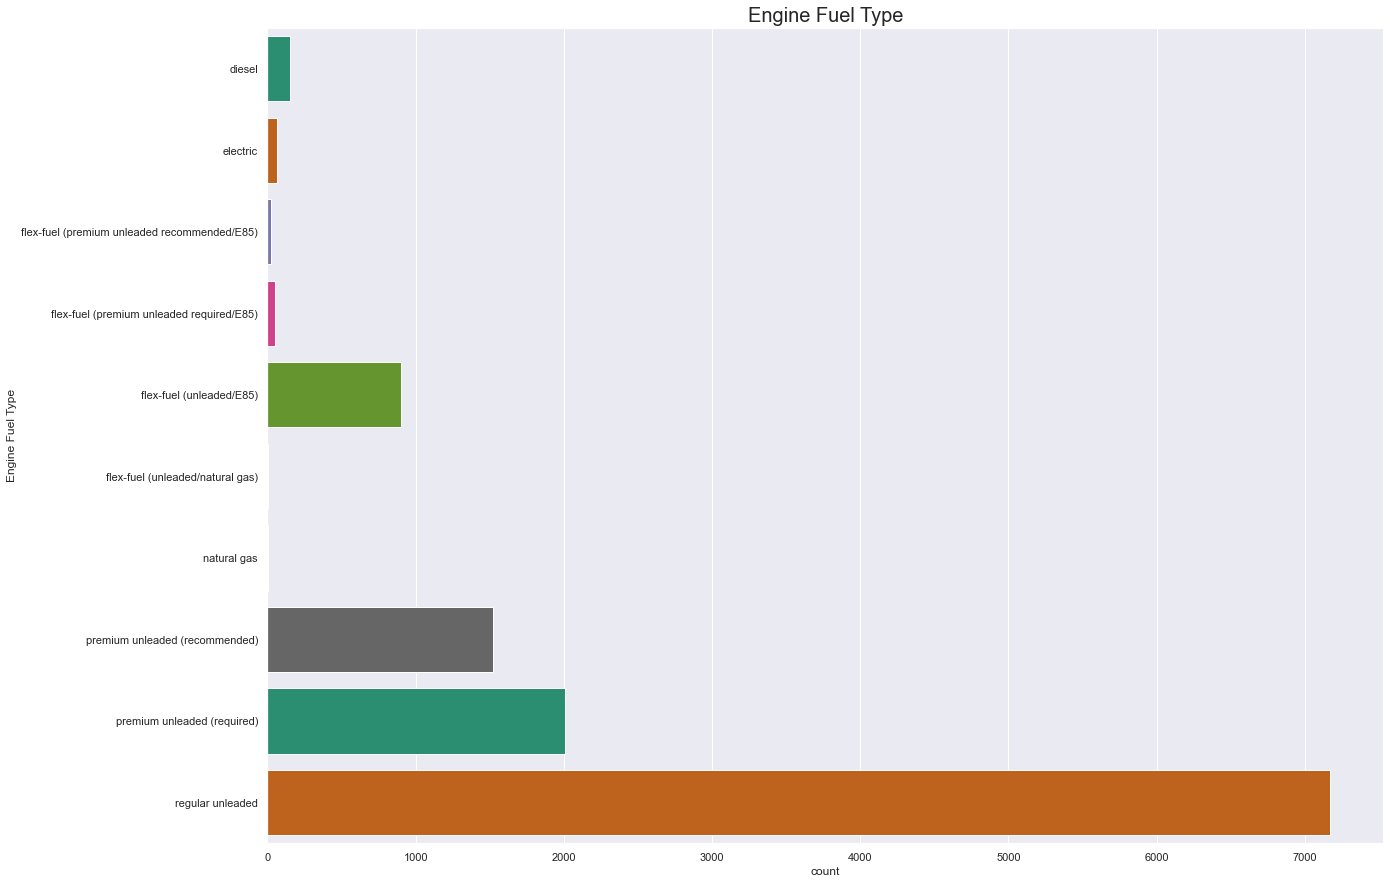

In [111]:
plt.figure(figsize = (20,15)) 
sns.countplot(y=data['Engine Fuel Type'].sort_values(ascending = True), palette= 'Dark2')

plt.title('Engine Fuel Type', fontsize=20)
plt.show()

#### Countplot of Vehicle Size

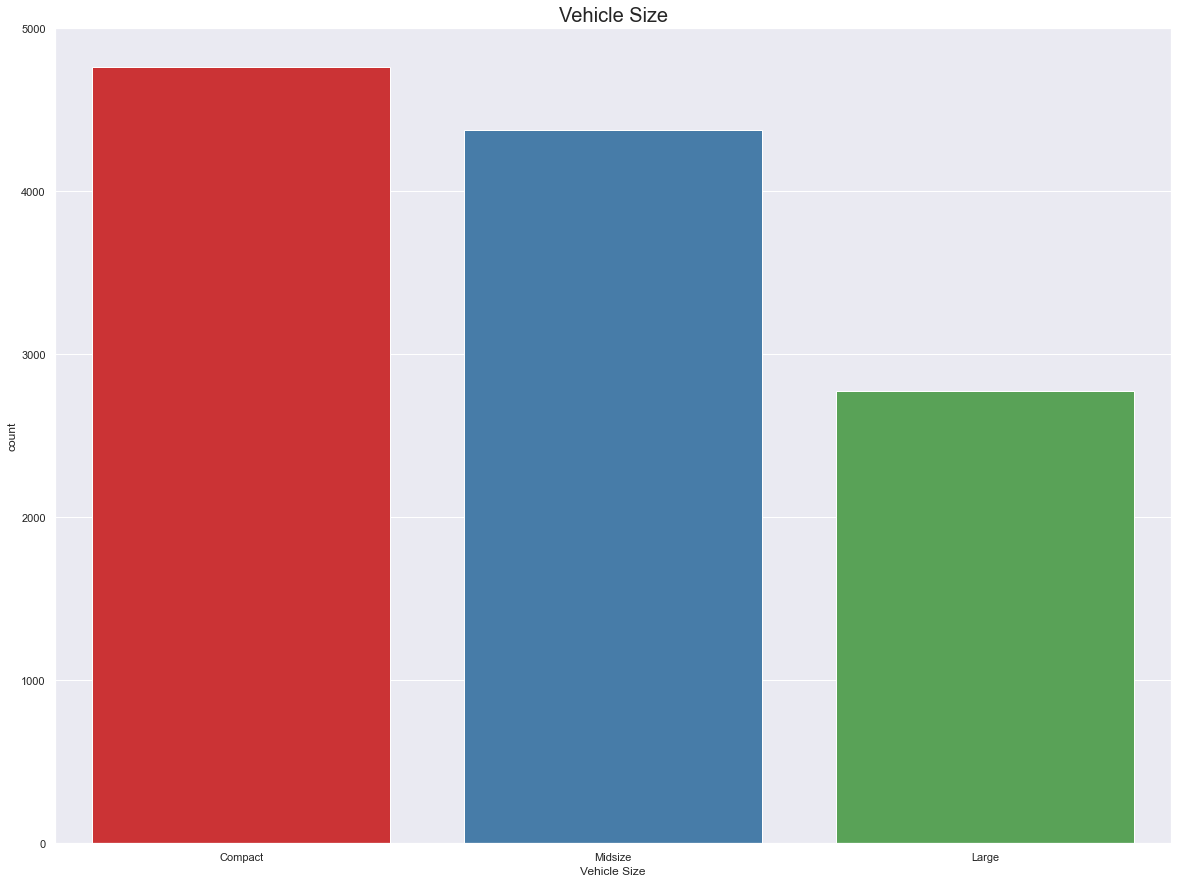

In [112]:
plt.figure(figsize = (20,15)) 
sns.countplot(data['Vehicle Size'], palette= 'Set1')

plt.title('Vehicle Size', fontsize=20)
plt.show()

#### Missing Values

<AxesSubplot:>

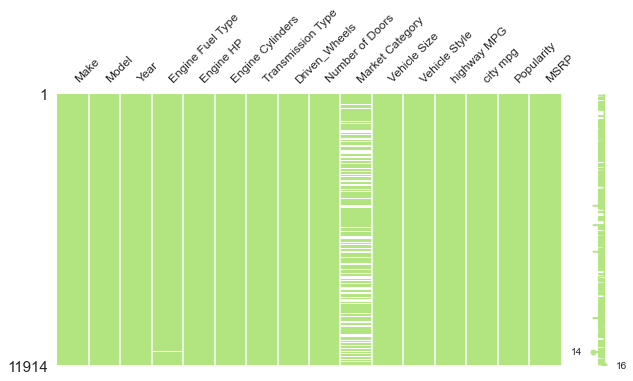

In [113]:
msno.matrix(data, color = (0.7, 0.9,0.5), figsize=(10,5), fontsize=12)

- there are missing values in 'Market Category' features
- There are also a few missing values in 'Engine Fuel Type'

### Checking the NULL values

In [114]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [115]:
data['Number of Doors'].mean()

3.4360933825999327

In [116]:
data['Number of Doors'].median()

4.0

In [117]:
# Replacing the null values with a number.

data['Number of Doors'].fillna(4.0, inplace = True)

In [118]:
#To check if the missing values has been replaced

data['Number of Doors'].isnull().sum()

0

In [119]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Heatmap

<AxesSubplot:>

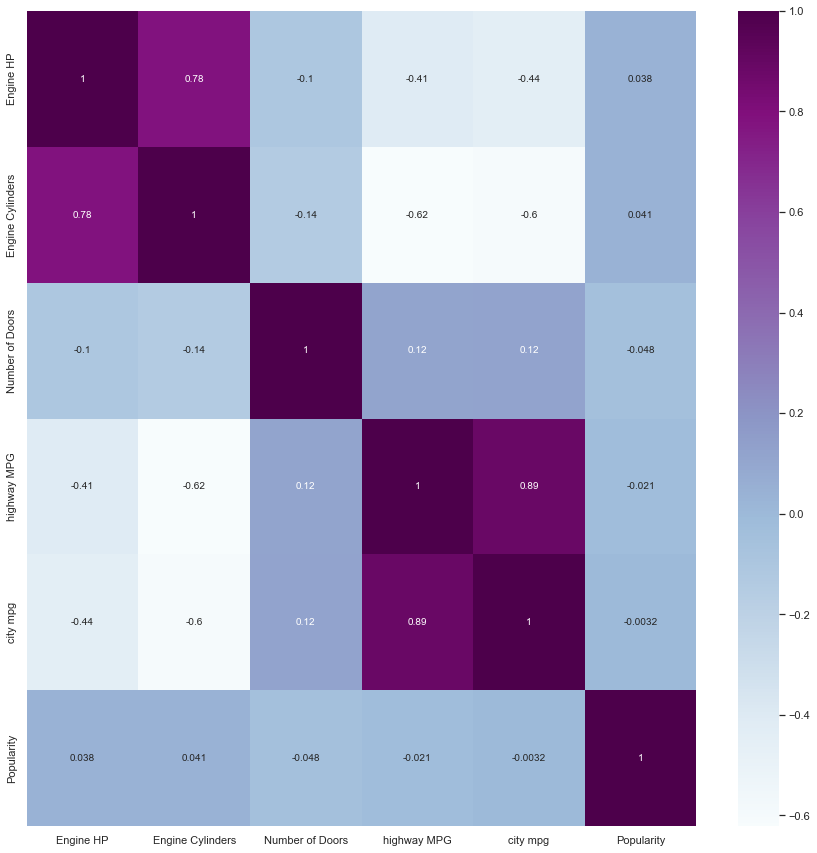

In [120]:
plt.figure(figsize = (15,15))
numeric_columns = ['Engine HP', 'Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data,cmap="BuPu", annot=True)

We see the 'Highway MPG' and 'city mpg' are highly correlated. That is the reason that we got a value of about  0.89. In addition to this, we also see that 'Engine HP' and 'Engine Cylinders' are correlated as well. That is true as having a higher number of cylinder would ensure that there is a high horsepower on our car.

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Creating a new column

In [122]:
# Create new column called "Present Year" and make it equal to 2021 respectively.

data['Present Year']= 2021

- print the head of the dataframe to check the values that are present in the dataframe.

In [123]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2021
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2021
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2021
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2021
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2021


In [124]:
data['Years of Manufacture']=data['Present Year']-data['Year']

In [125]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year,Years of Manufacture
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2021,10
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2021,10
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2021,10
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2021,10
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2021,10


In [126]:
data.drop('Present Year', axis=1, inplace=True)

In [127]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years of Manufacture
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,10
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,10
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,10
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,10
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,10


### Plotting the barplot of 'Year of Manufacture'

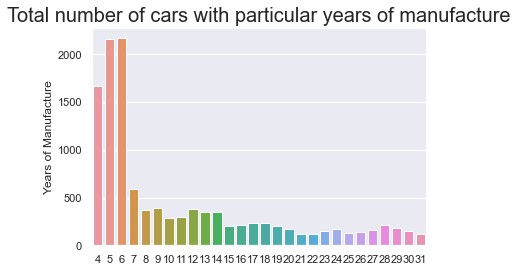

In [131]:
sns.barplot(y=data['Years of Manufacture'].value_counts(), x=data['Years of Manufacture'].value_counts().index)

plt.title("Total number of cars with particular years of manufacture",fontsize=20)

plt.show()

We see that most of the values are about 6 years old. Therefore , we are working with young cars as there are some other cars in our data that are about 31 years old

### Unique values in 'Engine Fuel Type'

In [132]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [133]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [134]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

### Manipulation of Data

#### Shuffling the data 

In [135]:
shuffled_data = shuffle(data, random_state = 100)
X= shuffled_data.drop(['MSRP'], axis = 1)
y= shuffled_data['MSRP']

#### Dividing the data into training and testing set

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)

In [137]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the ouput test data is: {}".format(y_test.shape))

The size of the input train data is: (9531, 16)
The size of the output train data is: (9531,)
The size of the input test data is: (2383, 16)
The size of the ouput test data is: (2383,)


### Encoding the data

- Encoding is converting the data in the form of categorical features so that we would be working on the data that is mathematical.

In [138]:
encoder = TargetEncoder(cols = 'Year')

In [140]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years of Manufacture
10938,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,17,13,2031,6
1223,Honda,Accord,2015,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,36,27,2202,6
472,Ferrari,458 Italia,2015,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,6
8150,Dodge,Ram Pickup 1500,2008,regular unleaded,310.0,8.0,MANUAL,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,16,12,1851,13
2038,Ford,Bronco,1996,regular unleaded,199.0,8.0,MANUAL,four wheel drive,2.0,NaN,Midsize,2dr SUV,16,13,5657,25


In [141]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'])

TargetEncoder(cols=['Year'])

In [143]:
X_train['Year']= encoder.transform(X_train['Year'])
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years of Manufacture
10938,Toyota,Tundra,40949.014584,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,17,13,2031,6
1223,Honda,Accord,40949.014584,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,36,27,2202,6
472,Ferrari,458 Italia,40949.014584,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,6
8150,Dodge,Ram Pickup 1500,40949.014584,regular unleaded,310.0,8.0,MANUAL,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,16,12,1851,13
2038,Ford,Bronco,40949.014584,regular unleaded,199.0,8.0,MANUAL,four wheel drive,2.0,NaN,Midsize,2dr SUV,16,13,5657,25


In [145]:
encoder = TargetEncoder(cols ='Model')
encoder.fit(X_train['Model'],y_train.to_frame()['MSRP'])
X_train['Model']= encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years of Manufacture
10938,Toyota,37820.886320,40949.014584,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,17,13,2031,6
1223,Honda,28047.497942,40949.014584,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,36,27,2202,6
472,Ferrari,88197.699767,40949.014584,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,6
8150,Dodge,31224.199483,40949.014584,regular unleaded,310.0,8.0,MANUAL,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,16,12,1851,13
2038,Ford,32758.239792,40949.014584,regular unleaded,199.0,8.0,MANUAL,four wheel drive,2.0,NaN,Midsize,2dr SUV,16,13,5657,25
